4.  En este ejercicio, utilizaremos el dataset de automóviles disponible en el siguiente enlace: 
https://archive.ics.uci.edu/static/public/9/auto+mpg.zip. Este conjunto de datos contiene 
información sobre varios atributos de automóviles, incluyendo Millas por galón de combustible (MPG)
y Caballos de Fuerza (HP).

    a. Ajustar un modelo lineal que relacione MPG con HP utilizando todos los puntos del dataset.
    Calcular el 𝑅2 para este modelo.  
- (i)Ajustar logaritmo de MPG vs HP y calcular 𝑅2.  
- (ii)Ajustar logaritmo de MPG vs logaritmo HP y calcular 𝑅2.

R2 del logMPG vs HP: 0.6891575108068901


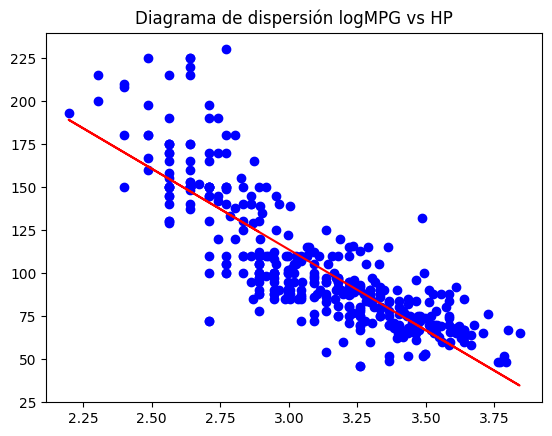

R2 del logMPG vs logHP: 0.722696751235987


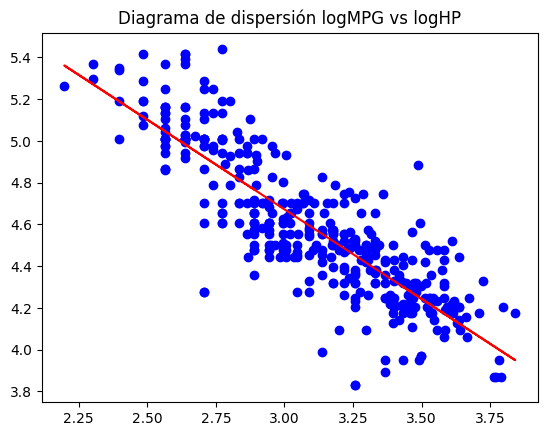

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the txt file as if it were a CSV with tab or space separation
file_path = '/workspaces/Estadistica1/Practica regresion/auto-mpg.data'
df = pd.read_csv(file_path, sep= r'\s+', header=None)
# Rename columns
df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') 
df = df.dropna()

muestras_x = df['mpg']
log_x = np.log(muestras_x) #Aplicamos logaritmo por consigna
muestras_y = df['horsepower']
log_y = np.log(muestras_y) #Same here


#i->logMPG vs HP
b1,b0 =np.polyfit(log_x,muestras_y, 1)
y = b0 + b1*log_x
residuales = muestras_y - y
r2 = 1 - sum(residuales**2)/sum((muestras_y - np.mean(muestras_y))**2)
print('R2 del logMPG vs HP:', r2)

# Graficar el diagrama de dispersión
plt.scatter(log_x, muestras_y, color='blue')
plt.plot(log_x, log_x*b1 + b0, color='red')
plt.title('Diagrama de dispersión logMPG vs HP')
plt.show()


#ii->logMPG vs logHP
beta1,beta0 = np.polyfit(log_x,log_y, 1)

y = beta0 + beta1*log_x

residuales = log_y - y
r2 = 1 - sum(residuales**2)/sum((log_y - np.mean(log_y))**2)
print('R2 del logMPG vs logHP:', r2)

# Graficar el diagrama de dispersión
plt.scatter(log_x, log_y, color='blue')
plt.plot(log_x, log_x*beta1 + beta0, color='red')
plt.title('Diagrama de dispersión logMPG vs logHP')
plt.show()



(b) Veamos qué pasa si no usamos todo el dataset sino sólo un porcentaje.  
- (i)Ajustar un modelo lineal a MPGvsHP,pero esta vez utilizando solo el 80% de los puntos del dataset seleccionados al azar. ¿Cuánto vale 𝑅2? ¿Y sobre el 20% restante de los puntos?  
- (ii)Repetir el punto anterior para diferentes porcentajes de datos de entrenamiento.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

muestras_x= df['mpg']
muestras_y= df['horsepower']    

#Separamos el dataset en train y test (80 y 20)
X_train, X_test, y_train, y_test = train_test_split(muestras_x, muestras_y, test_size=0.2, random_state=42)

beta1,beta0= np.polyfit(X_train,y_train, 1)
y = beta0 + beta1*X_train
residuales = y_train - y

r2 = 1 - sum(residuales**2)/sum((y_train - np.mean(y_train))**2)
print('R2 del MPG vs HP:', r2)

#vemos como se comporta el modelo con el dataset de test
y_test_pred = beta0 + beta1*X_test
residuales = y_test - y_test_pred
r2 = 1 - sum(residuales**2)/sum((y_test - np.mean(y_test))**2)
print('R2 del MPG vs HP con el dataset de test:', r2)


R2 del MPG vs HP: 0.6121193728863612
R2 del MPG vs HP con el dataset de test: 0.5800751948319572


In [48]:
#Ahora lo volvemos a hacer con otro porcentaje (70 y 30)
X_train, X_test, y_train, y_test = train_test_split(muestras_x, muestras_y, test_size=0.3, random_state=42)

beta1,beta0= np.polyfit(X_train,y_train, 1)
y = beta0 + beta1*X_train
residuales = y_train - y

r2 = 1 - sum(residuales**2)/sum((y_train - np.mean(y_train))**2)
print('R2 del MPG vs HP:', r2)

#vemos como se comporta el modelo con el dataset de test
y_test_pred = beta0 + beta1*X_test
residuales = y_test - y_test_pred
r2 = 1 - sum(residuales**2)/sum((y_test - np.mean(y_test))**2)
print('R2 del MPG vs HP con el dataset de test:', r2)


R2 del MPG vs HP: 0.6262397134870881
R2 del MPG vs HP con el dataset de test: 0.557883976456414


(c) Utilizando el dataset completo, realizar ajustes lineales para relacionar MPG con cada una
 de las variables. Ordenar las variables de acuerdo al 𝑅2 obtenido de la más importante a la
 menos importante

In [53]:
R2={}
columnas= ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']

# Convertir las columnas a numéricas y eliminar filas con valores NaN solo una vez
df[columnas] = df[columnas].apply(pd.to_numeric, errors='coerce') 
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')
df = df.dropna(subset=columnas + ['mpg'])  # Eliminar filas con valores NaN en las columnas relevantes

# Actualizar muestras_x después de eliminar NaN
muestras_x = df['mpg']

for columna in columnas:
    muestras_y = df[columna]
    b1,b0 = np.polyfit(muestras_x,muestras_y, 1)
    y = b0 + b1*muestras_x
    residuales = muestras_y - y
    r2 = 1 - sum(residuales**2)/sum((muestras_y - np.mean(muestras_y))**2)
    R2[columna] = r2
R2 = dict(sorted(R2.items(), key=lambda item: item[1], reverse=True))
print(R2)



{'weight': 0.6926304331206254, 'displacement': 0.6482294003193044, 'horsepower': 0.6059482578894348, 'cylinders': 0.6046889889441246, 'model_year': 0.3370278133096227, 'origin': 0.3194609386689673, 'acceleration': 0.1792070501562545}
